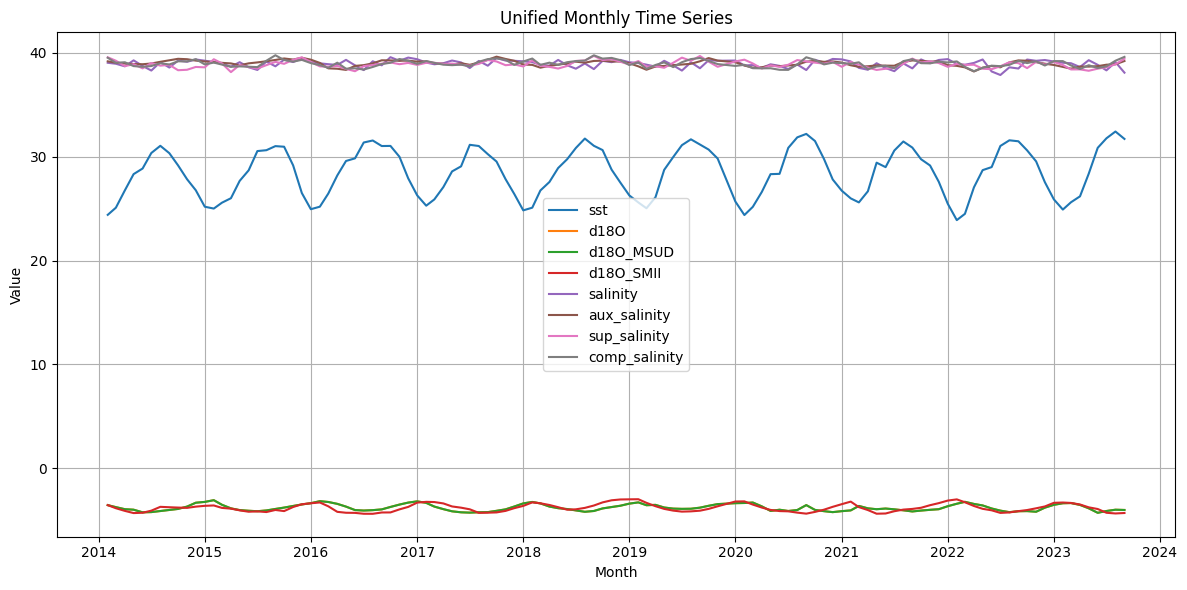

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unified dataset
df = pd.read_csv("unified_datasets.csv")
df["month"] = pd.to_datetime(df["month"].astype(str))  # convert Period to datetime for plotting
df = df.dropna()

# Plot each column
plt.figure(figsize=(12, 6))
for col in df.columns:
    if col != "month":
        plt.plot(df["month"], df[col], label=col)

plt.title("Unified Monthly Time Series")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

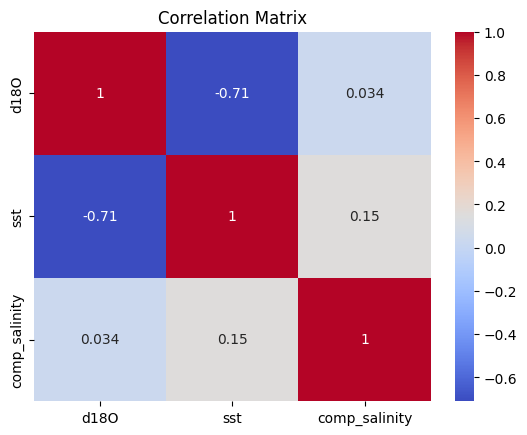

In [2]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Complementary Salinity Data
correlation_matrix = df[['d18O', 'sst', 'comp_salinity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     61.86
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           7.97e-19
Time:                        15:57:19   Log-Likelihood:                 11.965
No. Observations:                 115   AIC:                            -17.93
Df Residuals:                     112   BIC:                            -9.695
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -183.501      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/1158018541.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/1158018541.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


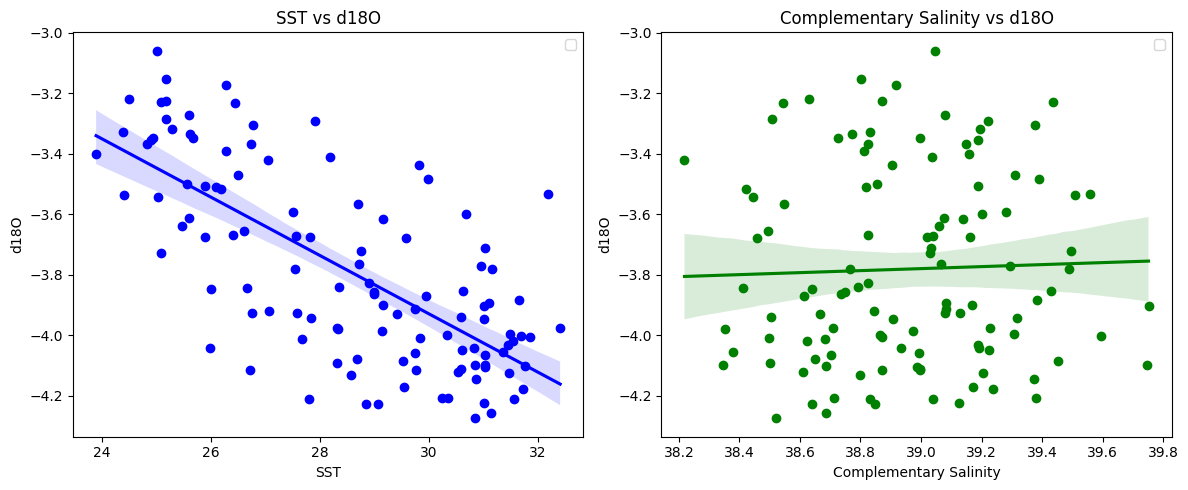

In [3]:
# Multiple Linear Regression
X = df[['sst', 'comp_salinity']]
y = df['d18O']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

# Visualize
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(df['sst'], df['d18O'], color='blue')
sns.regplot(x='sst', y='d18O', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
axs[0].legend()
axs[0].set_title("SST vs d18O")
axs[0].set_xlabel("SST")
axs[0].set_ylabel("d18O")

axs[1].scatter(df['comp_salinity'], df['d18O'], color='green')
sns.regplot(x='comp_salinity', y='d18O', data=df, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
axs[1].legend()
axs[1].set_title("Complementary Salinity vs d18O")
axs[1].set_xlabel("Complementary Salinity")
axs[1].set_ylabel("d18O")

plt.tight_layout()
plt.show()

In [4]:
X_sst = sm.add_constant(df['sst'])
model_sst = sm.OLS(df['d18O'], X_sst).fit()
print("R² for SST only:", model_sst.rsquared)

X_salinity = sm.add_constant(df['comp_salinity'])
model_salinity = sm.OLS(df['d18O'], X_salinity).fit()
print("R² for Salinity only:", model_salinity.rsquared)

R² for SST only: 0.5037979808299236
R² for Salinity only: 0.0011657893377440276


# Results

**Statistically significant** negative correlation between SST and d18O.
- Pearson correlation of $-0.71$.
- Slope coefficient of $-0.2178$.
- $p < 0.001$.

**Statistically significant** positive correlation between SSS (sup) and d18O.
- Pearson correlation of $0.034$.
- Slope coefficient of $0.0465$.
- $p = 0.028 > 0.05$.

In [5]:
# Create lagged features for comp salinity
dataframes = {}
for i in range(-5, 6):
    if i != 0:
        copy = df.copy()
        copy['comp_salinity'] = df['comp_salinity'].shift(-i).fillna(method='ffill')
        copy = copy.dropna(subset=['d18O', 'sst', 'comp_salinity'])
        dataframes[i] = copy

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/2188584304.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copy['comp_salinity'] = df['comp_salinity'].shift(-i).fillna(method='ffill')


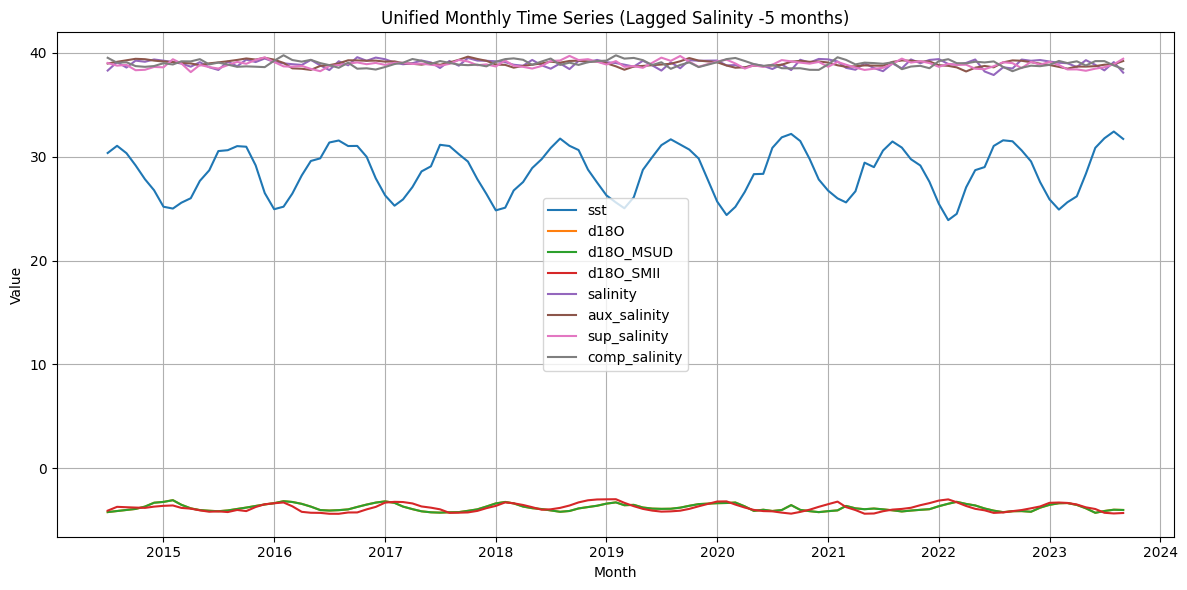

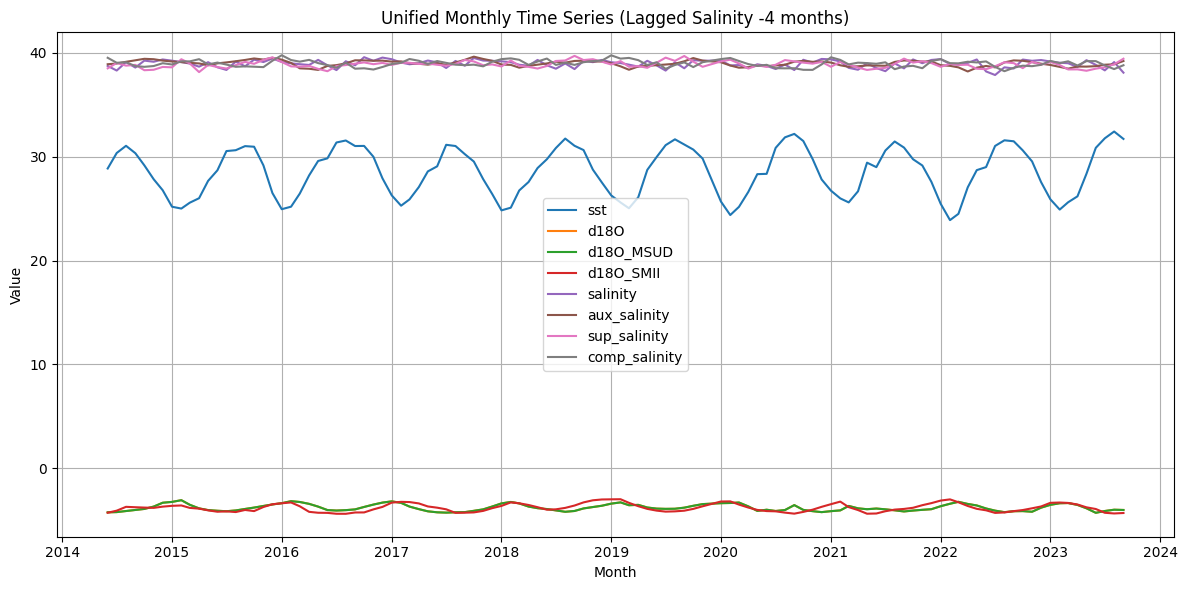

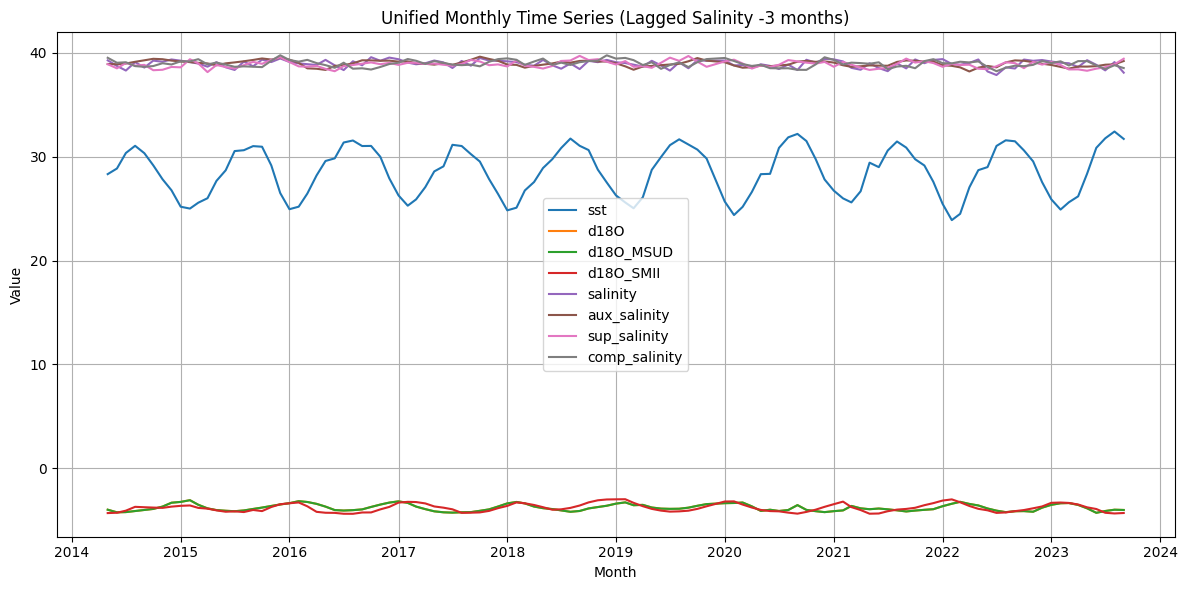

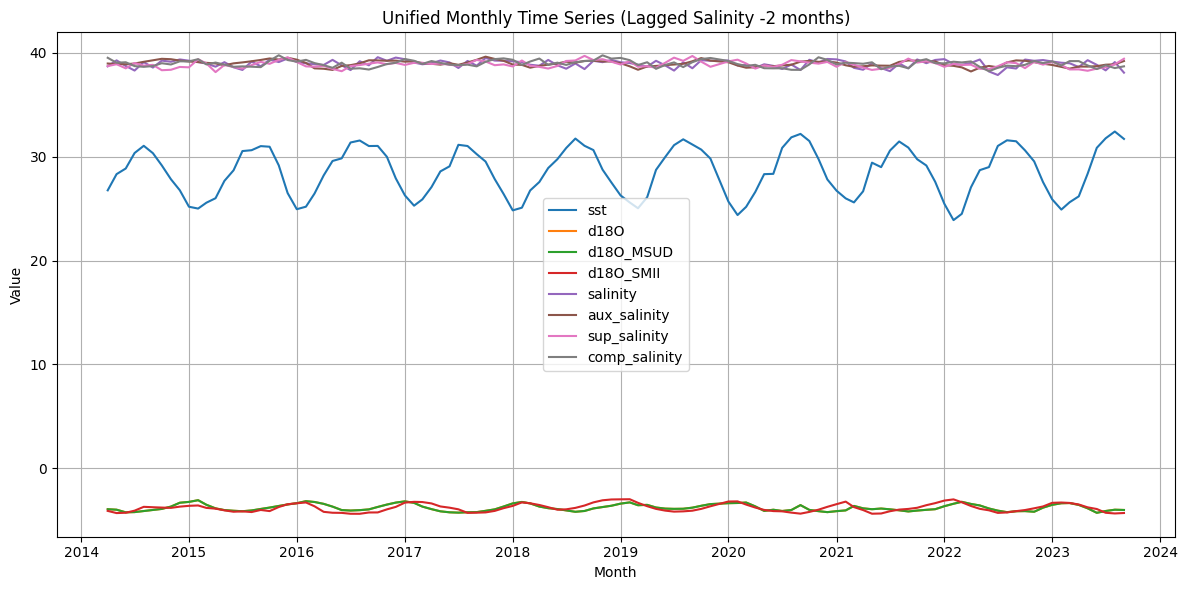

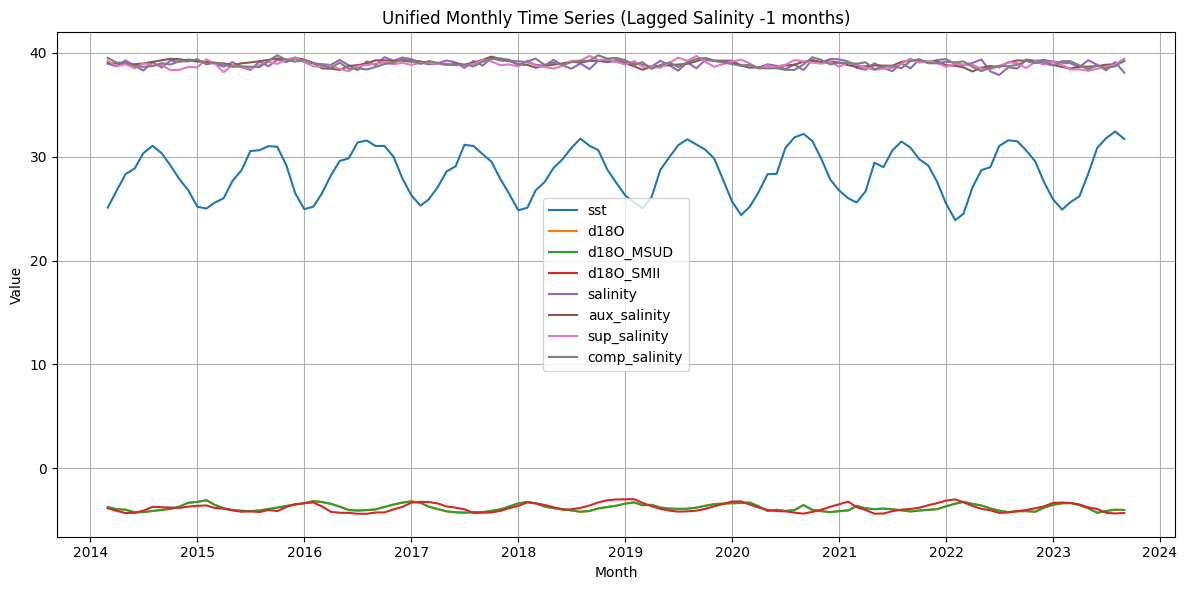

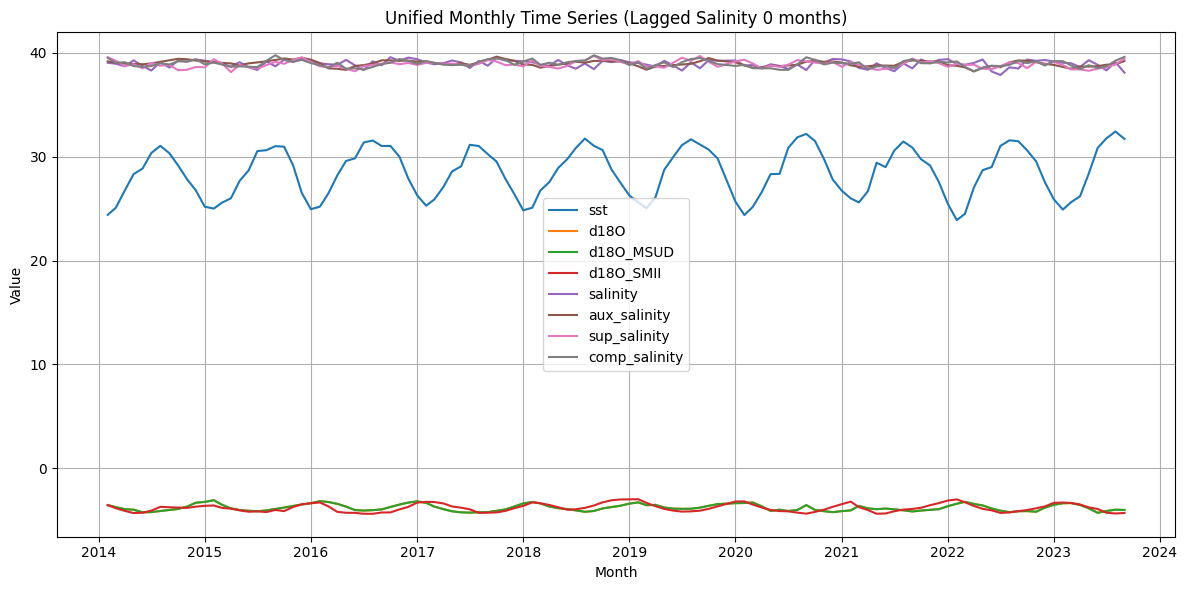

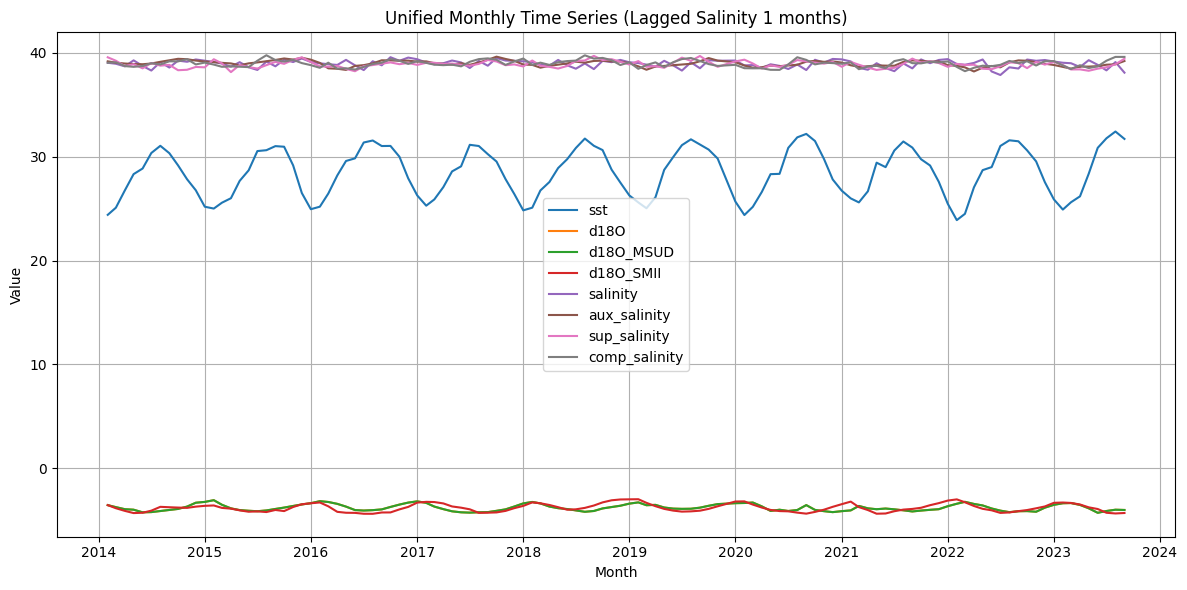

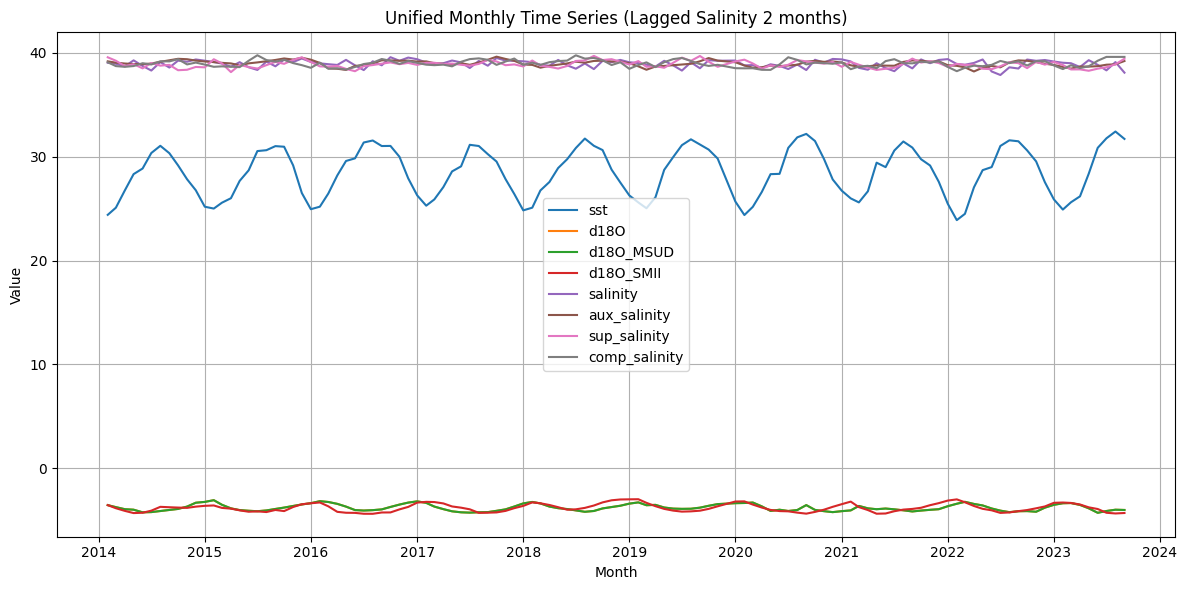

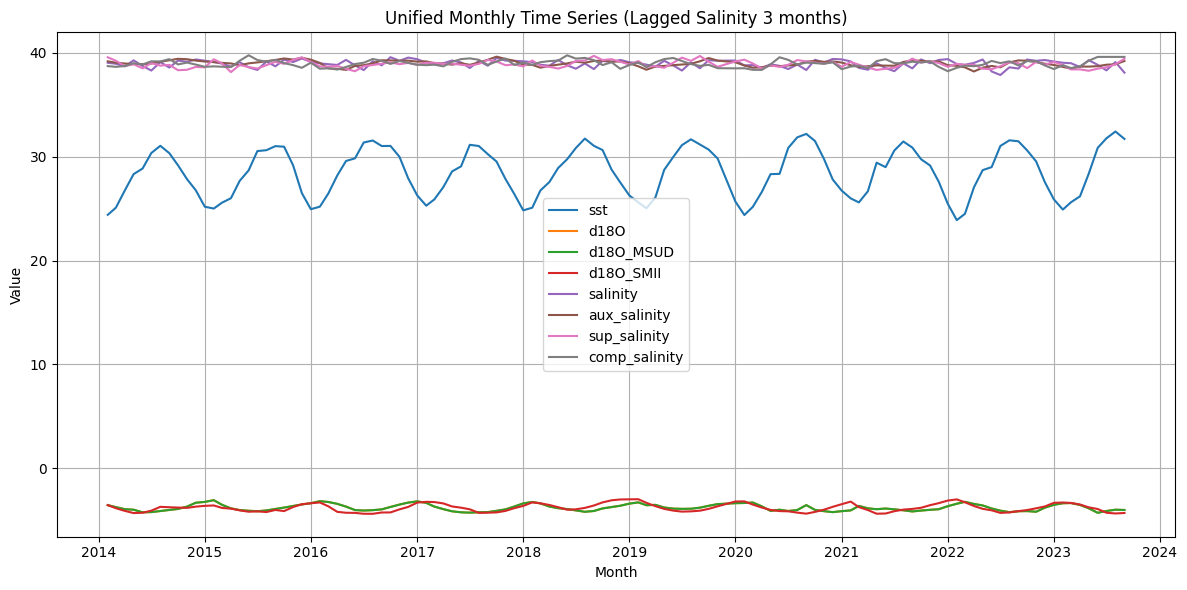

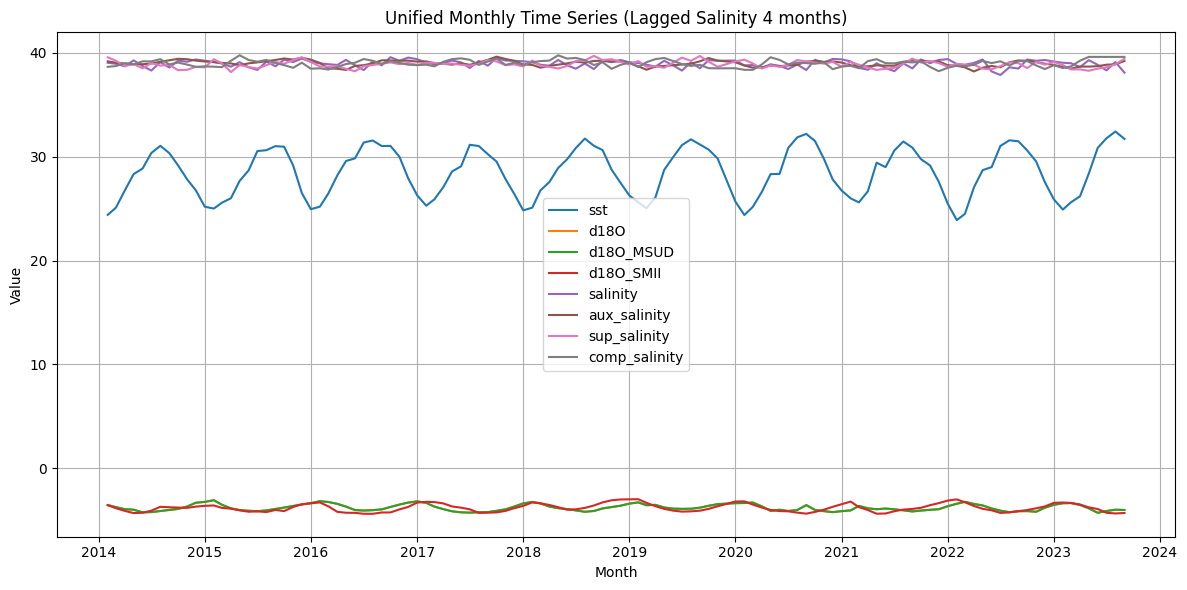

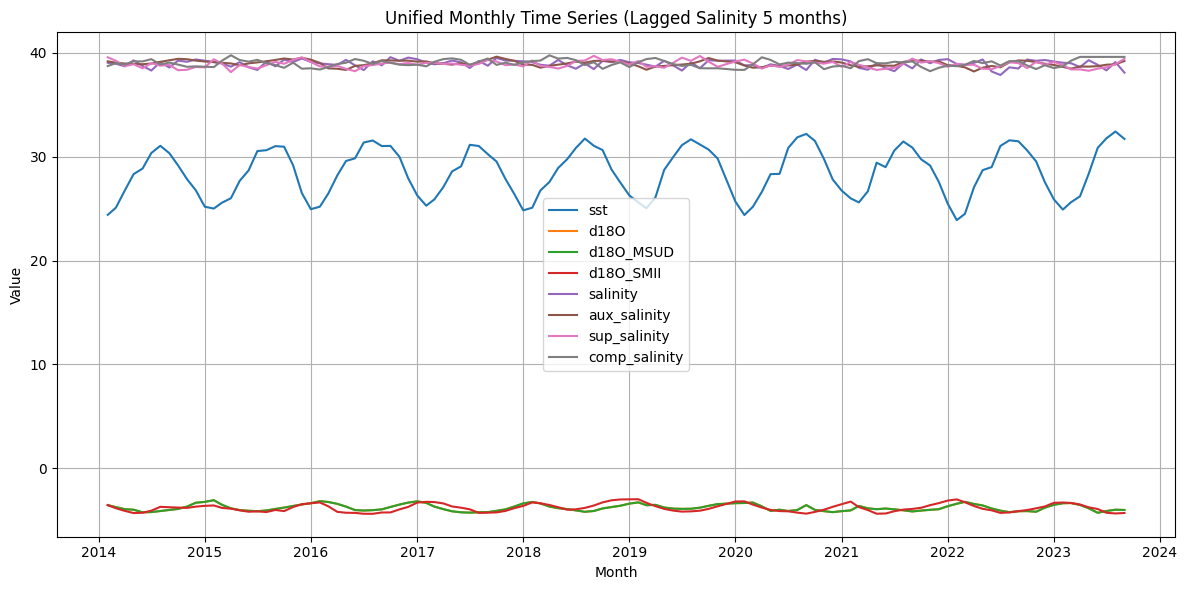

In [6]:
# Graph the lagged features on the same plot
for i in range(-5, 6):
    if i == 0:
        lagged_df = df
    else:
        lagged_df = dataframes[i]
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if col != "month":
            plt.plot(lagged_df["month"], lagged_df[col], label=col)
    
    plt.title("Unified Monthly Time Series (Lagged Salinity " + str(i) + " months)")
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     60.68
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           2.43e-18
Time:                        16:04:08   Log-Likelihood:                 11.339
No. Observations:                 110   AIC:                            -16.68
Df Residuals:                     107   BIC:                            -8.576
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7766      0.021   -178.975      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


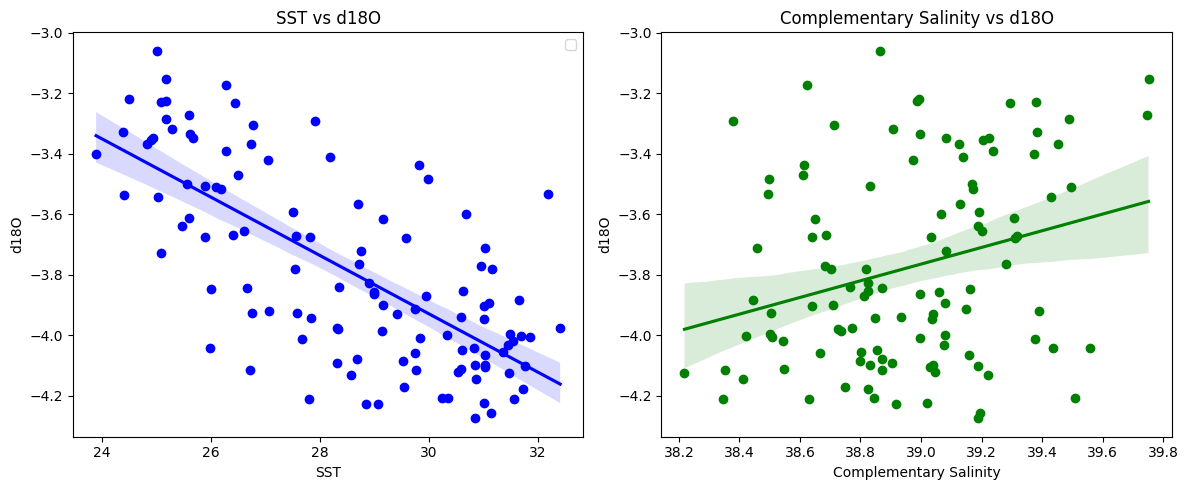

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     60.59
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           2.27e-18
Time:                        16:04:08   Log-Likelihood:                 10.632
No. Observations:                 111   AIC:                            -15.26
Df Residuals:                     108   BIC:                            -7.135
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7806      0.021   -178.694      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


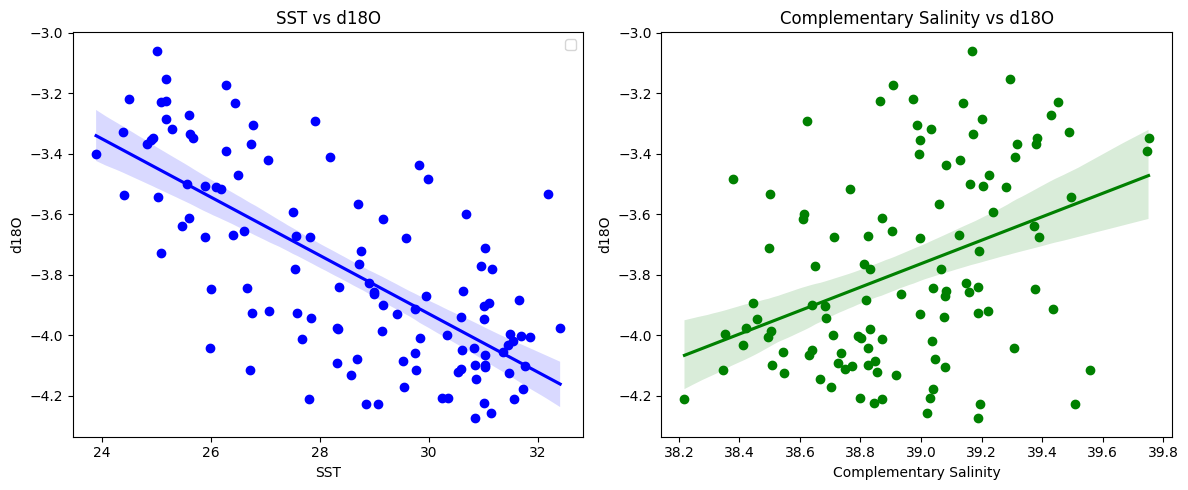

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     58.66
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           5.10e-18
Time:                        16:04:09   Log-Likelihood:                 9.8270
No. Observations:                 112   AIC:                            -13.65
Df Residuals:                     109   BIC:                            -5.499
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7824      0.021   -178.164      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


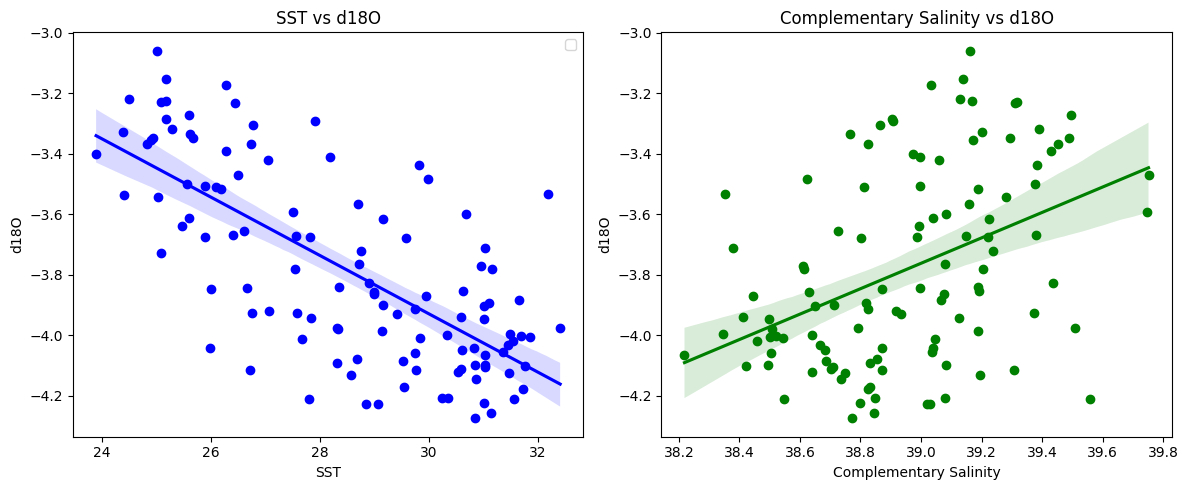

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     58.27
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           5.55e-18
Time:                        16:04:09   Log-Likelihood:                 9.8531
No. Observations:                 113   AIC:                            -13.71
Df Residuals:                     110   BIC:                            -5.524
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7836      0.021   -178.942      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


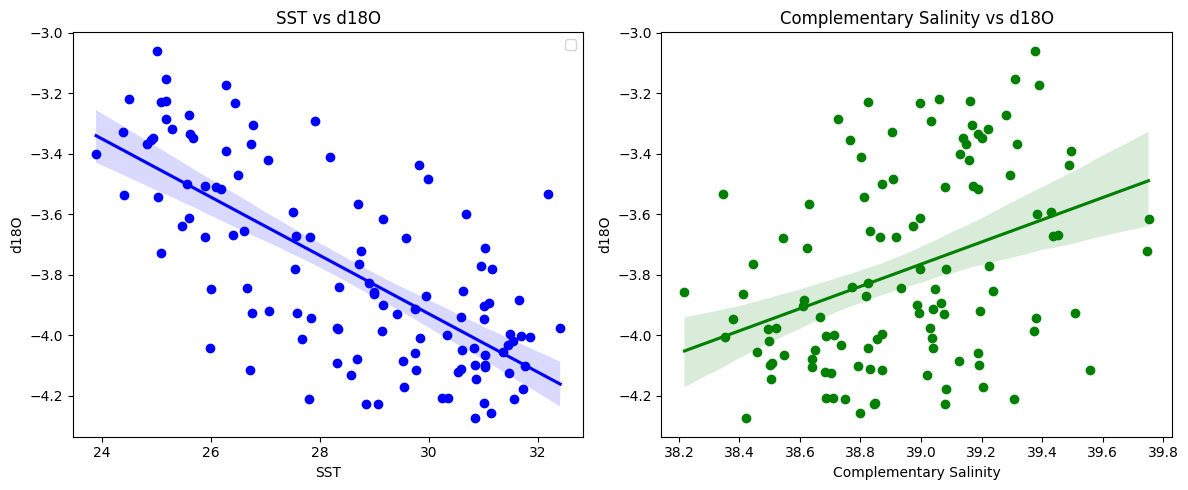

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     59.22
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.14e-18
Time:                        16:04:09   Log-Likelihood:                 10.639
No. Observations:                 114   AIC:                            -15.28
Df Residuals:                     111   BIC:                            -7.070
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7832      0.021   -180.836      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


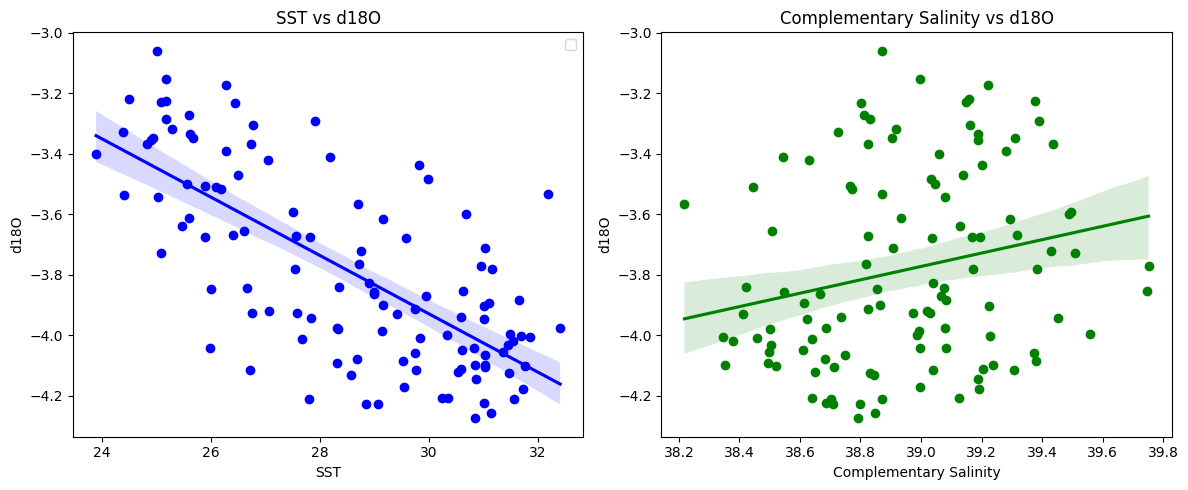

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     61.86
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           7.97e-19
Time:                        16:04:09   Log-Likelihood:                 11.965
No. Observations:                 115   AIC:                            -17.93
Df Residuals:                     112   BIC:                            -9.695
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -183.501      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


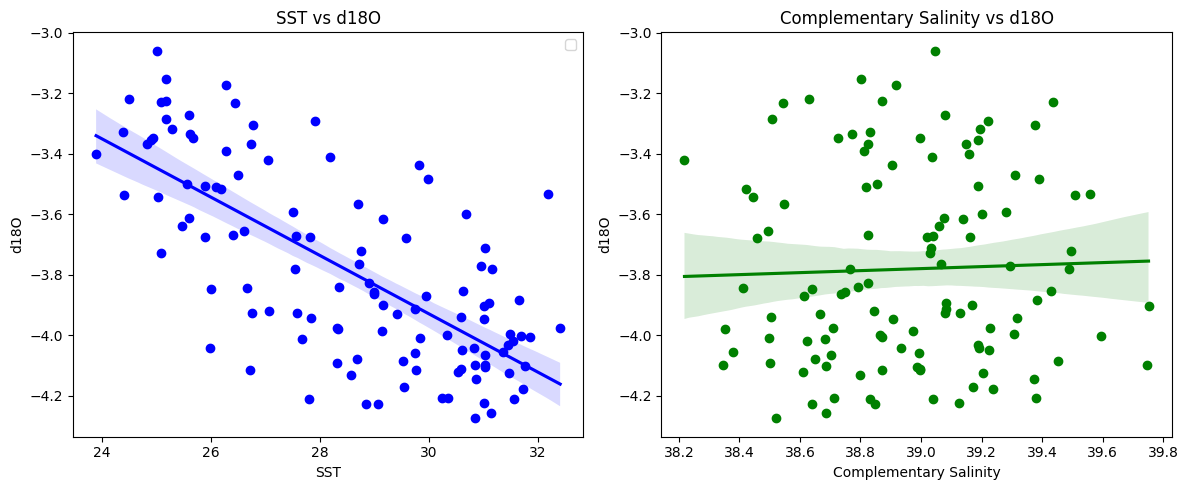

----------------------------------------------------------------------------------------------------


/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     58.31
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           4.42e-18
Time:                        16:04:09   Log-Likelihood:                 10.207
No. Observations:                 115   AIC:                            -14.41
Df Residuals:                     112   BIC:                            -6.180
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -180.718      0.0

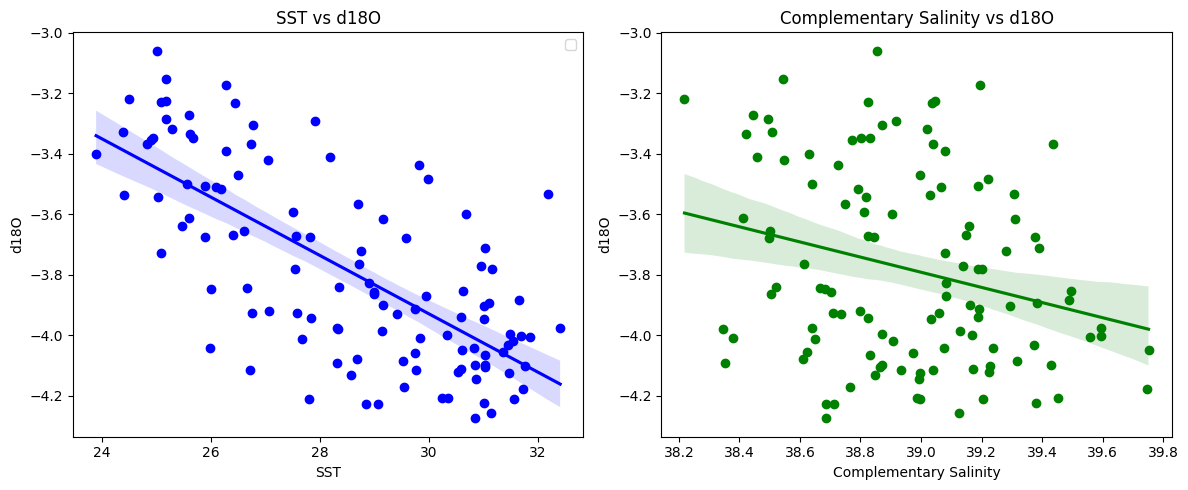

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     57.46
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           6.73e-18
Time:                        16:04:10   Log-Likelihood:                 9.7746
No. Observations:                 115   AIC:                            -13.55
Df Residuals:                     112   BIC:                            -5.314
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.021   -180.039      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()



R² for SST only: 0.5037979808299236
R² for Salinity only: 0.22785416319821583


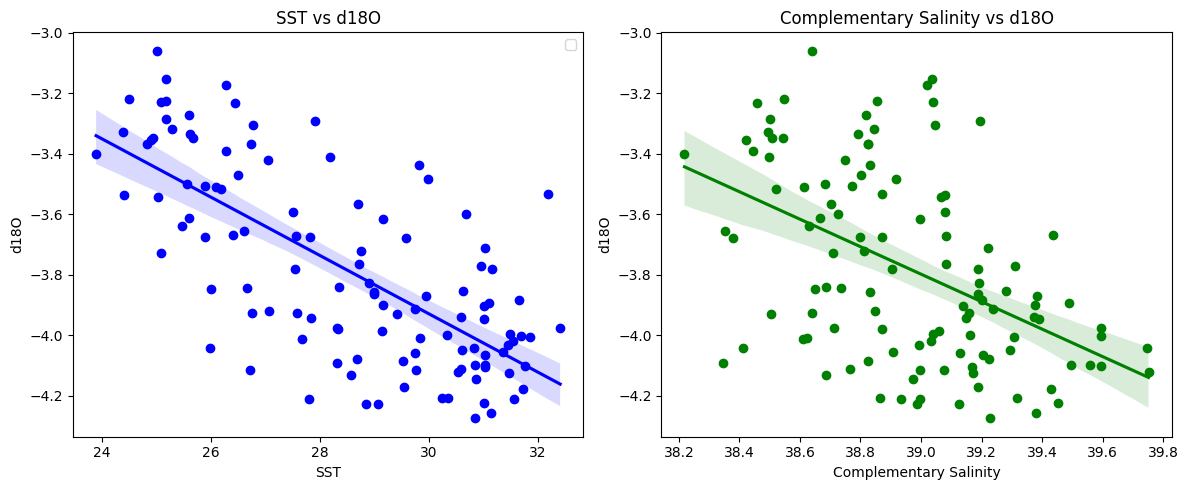

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     63.18
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           4.28e-19
Time:                        16:04:10   Log-Likelihood:                 12.604
No. Observations:                 115   AIC:                            -19.21
Df Residuals:                     112   BIC:                            -10.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.020   -184.524      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


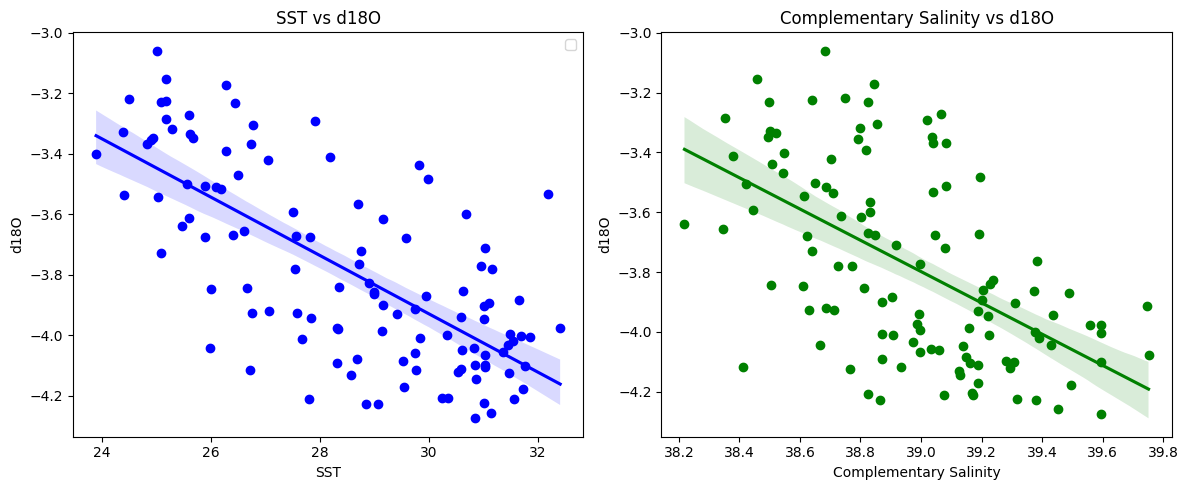

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     67.15
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           6.82e-20
Time:                        16:04:10   Log-Likelihood:                 14.489
No. Observations:                 115   AIC:                            -22.98
Df Residuals:                     112   BIC:                            -14.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.020   -187.573      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


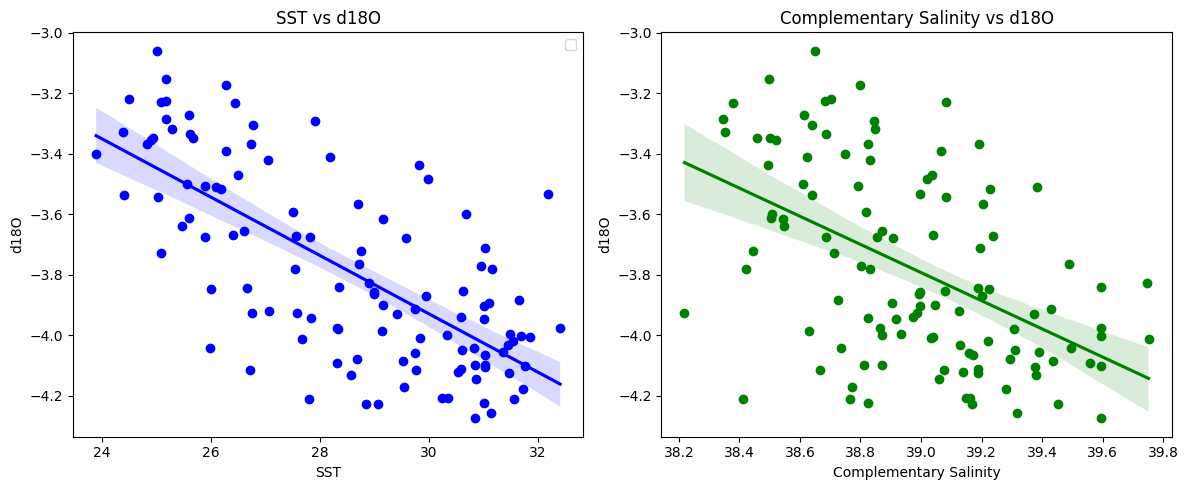

----------------------------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:                   d18O   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     63.75
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.27e-19
Time:                        16:04:10   Log-Likelihood:                 12.879
No. Observations:                 115   AIC:                            -19.76
Df Residuals:                     112   BIC:                            -11.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7810      0.020   -184.965      0.0

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_24093/4063847917.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


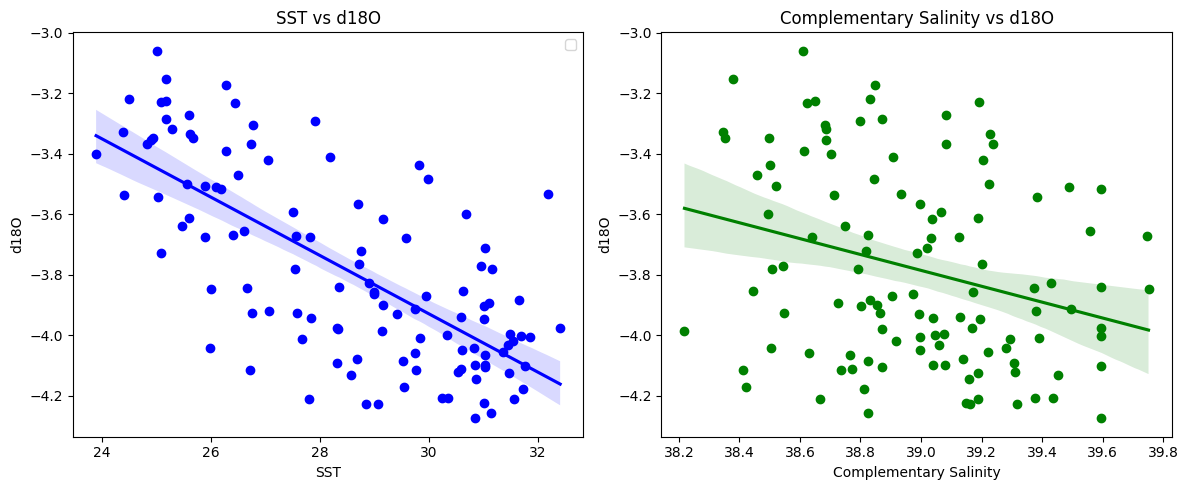

In [7]:
from IPython.display import display, HTML

# Multiple Linear Regression with lagged complementary salinity
for i in range(-5, 6):
    if i == 0:
        df_lagged = df
    else:
        df_lagged = dataframes[i]
    print('-' * 100)
    display(HTML(f'<span style="font-size:20px; font-weight:bold;">Regression with lagged complementary salinity {i} months:</span>'))
    X = df_lagged[['sst', 'comp_salinity']]
    y = df_lagged['d18O']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()
    print(model.summary())

    X_sst = sm.add_constant(df['sst'])
    model_sst = sm.OLS(df['d18O'], X_sst).fit()
    print("R² for SST only:", model_sst.rsquared)

    X_salinity = sm.add_constant(df_lagged['comp_salinity'])
    model_salinity = sm.OLS(df_lagged['d18O'], X_salinity).fit()
    print("R² for Salinity only:", model_salinity.rsquared)

    # Visualize
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].scatter(df['sst'], df['d18O'], color='blue')
    sns.regplot(x='sst', y='d18O', data=df, scatter=False, ax=axs[0], color='blue', line_kws={'label': 'Best Fit Line'})
    axs[0].legend()
    axs[0].set_title("SST vs d18O")
    axs[0].set_xlabel("SST")
    axs[0].set_ylabel("d18O")

    axs[1].scatter(df_lagged['comp_salinity'], df_lagged['d18O'], color='green')
    sns.regplot(x='comp_salinity', y='d18O', data=df_lagged, scatter=False, ax=axs[1], color='green', line_kws={'label': 'Best Fit Line'})
    axs[1].set_title("Complementary Salinity vs d18O")
    axs[1].set_xlabel("Complementary Salinity")
    axs[1].set_ylabel("d18O")

    plt.tight_layout()
    plt.show()